## This is just a Demo notebook

#### As titled, this is just a demonstration about how to transform an audio file into different feature representations using Librosa code.

In [1]:
import librosa
import librosa.display
import ffmpeg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y, sr = librosa.load('sample_audio.mp3')

In [3]:
# short-time fourier transformation
S = np.abs(librosa.stft(y))
S

array([[1.9385062e-02, 2.5682193e-01, 2.1010132e+00, ..., 1.1423596e+00,
        5.2666003e-01, 4.3771453e+00],
       [3.2277223e-01, 3.9453438e-01, 2.6230571e+00, ..., 3.8260875e+00,
        3.9639449e+00, 4.5064087e+00],
       [7.6930857e-01, 6.8867797e-01, 2.7646630e+00, ..., 3.3690565e+00,
        3.2880425e+00, 3.8556993e+00],
       ...,
       [7.1534959e-07, 1.6491958e-06, 2.0951118e-06, ..., 5.5122518e-06,
        1.6985785e-02, 3.7573587e-02],
       [1.0066357e-06, 1.6359535e-06, 2.3361922e-06, ..., 2.9336450e-06,
        1.6976064e-02, 3.7552856e-02],
       [1.4856769e-06, 6.4107820e-07, 3.3470499e-06, ..., 5.4533566e-06,
        1.6972644e-02, 3.7550639e-02]], dtype=float32)

In [7]:
S.shape

(128, 808)

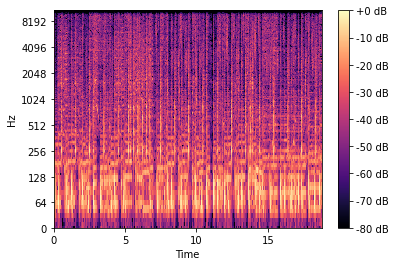

In [4]:
# plot 

fig, ax = plt.subplots()
img = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

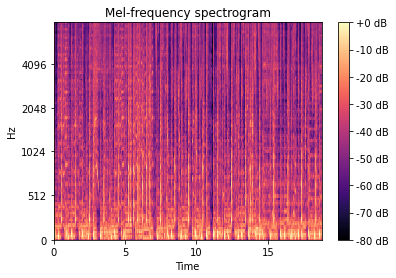

In [5]:
# Mel Frequency Spectrogram       numpy array format
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Plot
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                               y_axis='mel', sr=sr,
                               fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
plt.show()

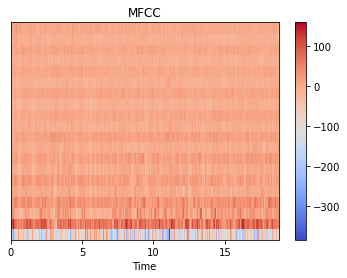

In [6]:
# Mel-frequency cepstral coefficients
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# plot
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()

In [8]:
mfccs

array([[-2.7809503e+02, -1.5339832e+02, -4.0888821e+01, ...,
        -6.6362473e+01, -7.7926414e+01, -8.9076790e+01],
       [ 2.8338261e+01,  3.8916512e+01,  5.8927898e+01, ...,
         5.7606300e+01,  5.2981613e+01,  4.8922173e+01],
       [ 7.1435455e+01,  3.9139366e+01,  2.7374325e+01, ...,
         2.6717896e+01,  3.0203117e+01,  3.1780119e+01],
       ...,
       [ 1.7078827e+01,  1.1964302e+01,  1.6037046e+01, ...,
         5.7688751e+00,  5.5321774e+00,  6.5542617e+00],
       [-2.0641611e+01, -1.7453136e+01, -1.0383459e+01, ...,
        -1.7556591e+01, -1.9094481e+01, -1.8944683e+01],
       [ 2.1636426e-02, -4.6004915e+00,  1.9127537e+00, ...,
        -4.4170074e+00, -4.1279278e+00, -3.8650126e+00]], dtype=float32)